Sinh viên trình bày: Nguyễn Phạm Diệu Hiền

Mã số: 212111040

# Đề tài: 
# Tìm tỷ trọng tối ưu của danh mục rủi ro với Mean-Variance Portfolio Theory

**Mô tả tình huống**: Bài tập sau giả định có 12 mã chứng khoán thuộc VN30 của 12 công ty niêm yết mà nhà đầu tư quen thuộc và có mức độ hiểu biết một cách nhất định về doanh nghiệp. Các công ty này này bao gồm các ngành nghề: Ngân hàng, chứng khoán, bất động sản, xây dựng, dầu khí. Trong trường hợp chỉ đầu tư vào 12 mã chứng khoán này, nhà đầu tư chấp nhận toàn bộ rủi ro có thể xảy ra để đánh đổi với lợi tức có được.

**Câu hỏi đặt ra cho bài toán**: Liệu có cần loại bỏ những mã cổ phiếu nào trong danh mục và tỷ trọng phân bổ cho từng mã tài sản là bao nhiêu? Thông tin cho trước là nhà đầu tư ưa thích mạo hiểm.

Để giải bài toán, tác giả đi qua các bước như sau:
1. Đọc dữ liệu thô và điều chỉnh để dữ liệu phù hợp với bài toán
2. Tạo các hàm cần thiết
3. Tính toán và trình bày dữ liệu
4. Đưa ra nhận định
5. Kiểm tra lại kết quả
6. Kết luận

In [120]:
#!pip install yfinance

In [363]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.optimize as opt


### 1. Đọc dữ liệu đầu vào 


In [364]:
import pandas as pd
data = pd.read_excel('/Users/nguyenhien/Desktop/OneDrive/2. Learning/2.5 Master of finance/3. Learning/12. Quantitative/Tiểu luận/Data_portfolio.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
dat = data.iloc[:, 3:15]

data

,Date,VN-index,VN30,HPG,STB,VCB,POW,VNM,SSI,MBB,NVL,TCH,VHM,PDR,VPB
798,2020-01-04,658.80,609.35,7892.2,7200.0,47228.0,7000.0,73880.0,6318.9,7153.5,28872.0,13606.2,40482000,12296.9,6277.8
758,2020-01-06,868.97,806.44,12650.4,10400.0,65658.0,10300.0,93445.0,8365.7,9174.5,29874.0,17564.3,58896000,15402.2,8796.4
736,2020-01-07,827.67,770.23,12536.0,10800.0,61665.0,9224.7,85851.9,8393.7,8855.4,33990.0,15034.6,55673000,13449.0,7685.3
692,2020-01-09,882.40,823.93,13826.4,11200.0,63738.0,9587.2,92174.7,8868.6,9600.0,34992.0,15673.3,57891000,15904.5,8629.7
671,2020-01-10,910.13,859.27,15052.9,14000.0,65351.0,9825.7,100951.4,10212.4,10583.9,35548.0,16361.4,56412000,21540.8,8852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2023-11-05,1058.26,1058.02,21750.0,26400.0,92000.0,13450.0,70500.0,22500.0,18600.0,13450.0,8350.0,495000,13750.0,19600.0
99,2023-12-01,1055.76,1068.47,20050.0,24900.0,85200.0,11650.0,79900.0,19350.0,18300.0,15200.0,7110.0,511000,14950.0,18600.0
40,2023-12-04,1071.61,1083.06,20750.0,25950.0,88300.0,13400.0,74400.0,22600.0,18800.0,14800.0,7820.0,519000,13650.0,21000.0
21,2023-12-05,1057.12,1056.09,22350.0,26550.0,91000.0,13250.0,70400.0,22350.0,18550.0,13900.0,8220.0,491000,13950.0,19800.0


### 2. Tạo các hàm cần thiết

Trong đó:
- Ma trận tỷ suất sinh lời kỳ vọng từng tài sản: `mu`
- Ma trận hiệp phương sai: `cov`
- Tỷ suất sinh lời kỳ vọng của danh mục `mu_M` được tính bằng hàm `return_port`
- Phương sai của danh mục `var_M` được tính bằng hàm `var_port`
- Độ lệch chuẩn của danh mục `sigma_M` được tính bằng hàm `sigma_port`

In [365]:
# 1. Giá trị cấp tài sản: Tỷ suất sinh lời tài sản: mu, Ma trận hiệp phương sai: cov
ret = dat.pct_change()
mu = ret.mean()
cov = ret.cov()

P = np.ones(12)/12
r = 0.077 / 12

# 2. Giá trị cấp danh mục: 
def return_port(P,mu):
    return np.dot(P,mu)

def var_port(P,cov):
    return P @ cov @ P.T

def sigma_port(P,cov):
    return  (P @ cov @ P.T) ** 0.5

mu_M= return_port(P,mu)
var_M = var_port(P,cov)
sigma_M = sigma_port(P,cov)

mu_M, sigma_M

(0.5668593305612428, 5.709472963305918)

Tạo một hàm `markowitz_optimization` mà khi truyền vào ma trận sinh lợi và ma trận hiệp phương sai sẽ tìm được tỷ trọng tối ưu bằng hàm Quadratic. Các bước tiến hành như sau

In [366]:
import numpy as np
from scipy.optimize import minimize

def markowitz_optimization(expected_returns_matrix, covariance_matrix):
    num_assets = len(expected_returns_matrix)

    # Hàm tiện ích Quadratic
    def utility_function(portfolio_weights):
        expected_return_port = return_port(expected_returns_matrix, portfolio_weights)
        variance = np.dot(portfolio_weights, np.dot(covariance_matrix, portfolio_weights))
        return -expected_return_port + 0.5 * variance

    # Ràng buộc tổng tỷ trọng
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}]

    # Giới hạn tỷ trọng từ 0 đến 1
    bounds = [(0, 1) for _ in range(num_assets)]

    # Tìm tỷ trọng tối ưu với hàm minimize
    initial_weights = np.ones(num_assets) / num_assets  # Tỷ trọng khởi tạo ban đầu
    result = minimize(utility_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    return optimal_weights
P_mass = markowitz_optimization(mu, cov)
P_mass

array([2.63365554e-02, 1.74014449e-17, 1.59150557e-02, 3.90312782e-18,
       4.97942899e-01, 9.12787547e-02, 8.72782749e-18, 2.14459368e-01,
       5.20689941e-02, 1.14751292e-03, 0.00000000e+00, 1.00850860e-01])

Kết quả của hàm là `P_mass` là tỷ trọng tối ưu mà không phân biệt cụ thể các trường hợp

### 3. Visualization
#### 3.1 Bộ tỷ trọng được xem là optimal

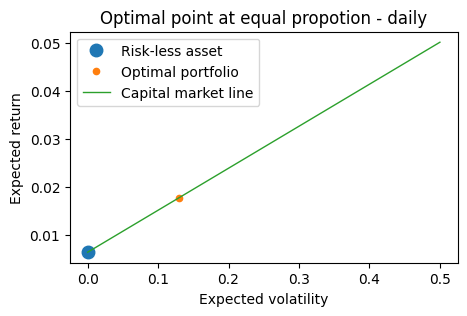

In [369]:
import matplotlib.pyplot as plt


# Tính giá trị trung bình lợi nhuận và độ biến động

mu_M_mass= return_port(P_mass,mu)
var_M_mass = var_port(P_mass,cov)
sigma_M_mass = sigma_port(P_mass,cov)

# Vẽ biểu đồ
plt.figure(figsize=(5, 3))

plt.plot(0, r, 'o', ms=9, label='Risk-less asset')
plt.plot(sigma_M_mass, mu_M_mass, '.', ms=9, label= f'Optimal portfolio')
plt.plot((0, 0.5), (r, r + (mu_M_mass - r) / sigma_M_mass * 0.5), label='Capital market line', lw=1.0)

plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.title('Optimal point at equal propotion - daily')

plt.legend()


#### 3.1 Giá trị Optimal tại các bổ tỷ trọng là optimal theo số lượng tài sản giảm dần

Tạo các công thức liên quan đến các biến cơ bản trong Lý thuyết của Markowitz. Sau đó ứng với mỗi trường hợp danh mục gồm 1 đến 5 tài sản sẽ tạo ra một bộ tỷ trọng tối ưu.

Trong đó:
- Ma trận tỷ suất sinh lời kỳ vọng từng tài sản: `expected_returns_matrix`
- Ma trận hiệp phương sai mô tả mối quan hệ tương quan giữa các cặp tài sản trong danh mục : `covariance_matrix`
- Phương sai của danh mục `Variance`
- Hàm tiện ích `utility_function` được sử dụng là hàm quadratic
- Đặt điều kiện để tỷ trọng các tài sản trong danh mục chạy từ 0 đến 1 và tổng của chúng trong trường hợp đó là 1: `bounds` và `constraints`
- Trước khi dùng đến phương pháp minimize, đặt giá trị tỷ trọng khởi tạo là  `initial_weights`

In [368]:
from scipy.optimize import minimize
import numpy as np

def markowitz_optimization_2(expected_returns_matrix, covariance_matrix):
    num_assets = len(expected_returns_matrix)

    # Hàm tiện ích Quadratic
    def utility_function(portfolio_weights):
        expected_return_port = np.dot(expected_returns_matrix, portfolio_weights)
        variance = np.dot(portfolio_weights, np.dot(covariance_matrix, portfolio_weights))
        return -expected_return_port + 0.5 * variance

    optimal_weights = []

    # Tìm tỷ trọng tối ưu cho từng trường hợp
    for n in range(num_assets):
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}]
        bounds = [(0, 1) for _ in range(num_assets)]

        # Thiết lập ràng buộc tỷ trọng bằng 0 cho n tài sản
        for i in range(n):
            bounds[i] = (0, 0)

        # Tìm tỷ trọng tối ưu
        initial_weights = np.ones(num_assets) / num_assets  # Tỷ trọng khởi tạo ban đầu
        result = minimize(utility_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

        optimal_weights.append(result.x)

    return optimal_weights

P_update_2 = markowitz_optimization_2(mu, cov)
P_update_2

[array([2.63365554e-02, 1.74014449e-17, 1.59150557e-02, 3.90312782e-18,
        4.97942899e-01, 9.12787547e-02, 8.72782749e-18, 2.14459368e-01,
        5.20689941e-02, 1.14751292e-03, 0.00000000e+00, 1.00850860e-01]),
 array([0.00000000e+00, 6.23066690e-18, 2.13762500e-01, 1.41696012e-18,
        3.31272699e-01, 4.02080950e-02, 0.00000000e+00, 2.11006837e-01,
        7.26666847e-02, 1.18793123e-03, 9.01761939e-18, 1.29895252e-01]),
 array([0.00000000e+00, 0.00000000e+00, 1.24404955e-01, 3.67544536e-17,
        3.83758424e-01, 1.04117983e-01, 0.00000000e+00, 2.12570459e-01,
        4.04219984e-02, 1.15692453e-03, 1.11672824e-17, 1.33569256e-01]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.81817767e-18,
        4.74115128e-01, 4.36260511e-02, 2.53087083e-17, 2.17372604e-01,
        7.76926119e-02, 1.16371741e-03, 0.00000000e+00, 1.86029888e-01]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.67362505e-01, 6.73875260e-02, 1.91903785e-17, 

Kết quả của hàm là `P_update_2` cho thấy giá trị các bộ tỷ trọng tương ứng với từng trường hợp danh mục bao gồm 1, 2, 3, ... tài sản

Từ đây vẽ đồ thị để kiểm tra xem, liệu nhà đầu tư có nên đầu tư bao nhiêu tài sản và với tỷ trọng phân bổ như thế nào cho từng loại tài sản

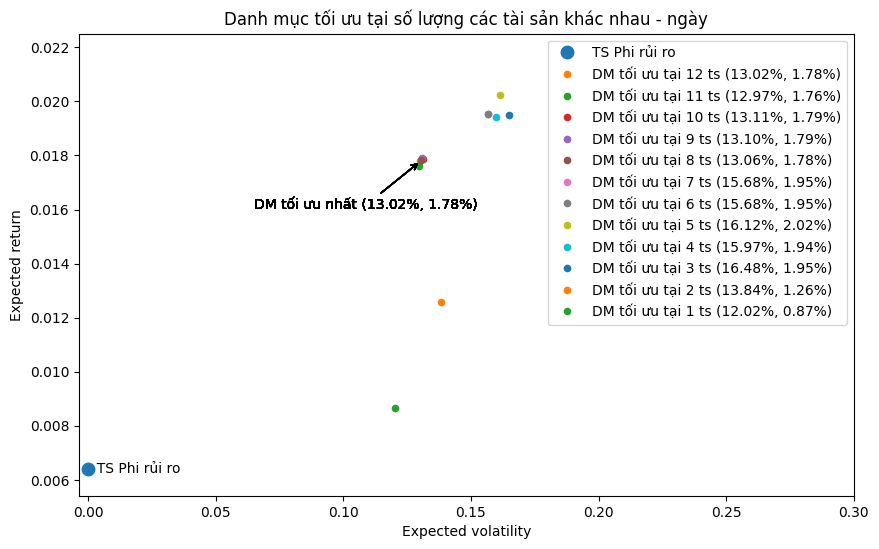

In [356]:
import matplotlib.pyplot as plt

# Các danh sách chứa thông tin về optimal point
mu_M_update_list = []
var_M_update_list = []
sigma_M_update_list = []

# Vòng lặp để tìm và vẽ optimal point cho mỗi tỷ trọng tối ưu
for P_update in P_update_2:
    mu_M_run = return_port(P_update, mu)
    var_M_run = var_port(P_update, cov)
    sigma_M_run = sigma_port(P_update, cov)

    mu_M_update_list.append(mu_M_run)
    var_M_update_list.append(var_M_run)
    sigma_M_update_list.append(sigma_M_run)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))

plt.plot(0, r, 'o', ms=9, label='TS Phi rủi ro')
plt.text(0, r, f'  TS Phi rủi ro', ha='left', va='center')

# Vẽ các optimal point và chú thích giá trị
for i in range(len(P_update_2)):
    plt.plot(sigma_M_update_list[i], mu_M_update_list[i], '.', ms=9, label=f'DM tối ưu tại {12-i} ts ({sigma_M_update_list[i]*100:.2f}%, {mu_M_update_list[i]*100:.2f}%)')
    plt.annotate(f'DM tối ưu nhất ({sigma_M_mass*100:.2f}%, {mu_M_mass*100:.2f}%)', 
                 xy=(sigma_M_mass, mu_M_mass), 
                 xytext=(sigma_M_mass*0.5, mu_M_mass*0.9), arrowprops=dict(arrowstyle='->'))

# Điều chỉnh các trục phóng to để các điểm không trùng nhau nhiều
plt.xlim(r-0.01, 0.3) 
plt.ylim(r-0.001, 0.0225) 

plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.title('Danh mục tối ưu tại số lượng các tài sản khác nhau - ngày')
plt.legend()
plt.show()


### 4. Nhận định ban đầu

Từ biểu đồ có thể thấy, danh mục tối ưu nhất theo lý thuyết Markowitz cho thấy tại điểm đó, việc đánh đổi lợi  tức và rủi ro là cân bằng. Tuy nhiên trong trường hợp này nhà đầu tư có khẩu vị rủi ro cao đối với các cổ phiếu được định sẵn từ trước nên danh mục tối ưu tại 5 tài sản sẽ phù hợp hơn. 

Do đó tác giả tiến hành phân tích cả hai danh mục trên so với chỉ số VN30, để biết được liệu nhà đầu tư nên lựa chọn điểm tối ưu tỷ trọng nào

In [357]:
Choosen_P_update_2 = P_update_2[0]
Choosen_P_update_3 = P_update_2[7]
Choosen_P_update_3

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16429318, 0.1890756 , 0.00106212,
       0.        , 0.6455691 ])

### 5. Xác thực kết quả

Để xác thực kết quả của cả hai danh mục, tác giả giả định lại 2 tình huống nhà đầu tư đầu tư từ năm 2020 vào 2 danh mục 
- Danh mục đúng với tỷ trọng Portfolio - Portfolio-optimal
- Danh mục đúng với tỷ trọng Portfolio theo khẩu vị rủi ro cao - Portfolio-riskfavour

và so sánh chúng với khả năng sinh lợi của VN30

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dat_index = data.iloc[:, 1:15]
dat_index['Date'] = data['Date']
dat_index

,VN-index,VN30,HPG,STB,VCB,POW,VNM,SSI,MBB,NVL,TCH,VHM,PDR,VPB,Date
798,658.80,609.35,7892.2,7200.0,47228.0,7000.0,73880.0,6318.9,7153.5,28872.0,13606.2,40482000,12296.9,6277.8,2020-01-04
758,868.97,806.44,12650.4,10400.0,65658.0,10300.0,93445.0,8365.7,9174.5,29874.0,17564.3,58896000,15402.2,8796.4,2020-01-06
736,827.67,770.23,12536.0,10800.0,61665.0,9224.7,85851.9,8393.7,8855.4,33990.0,15034.6,55673000,13449.0,7685.3,2020-01-07
692,882.40,823.93,13826.4,11200.0,63738.0,9587.2,92174.7,8868.6,9600.0,34992.0,15673.3,57891000,15904.5,8629.7,2020-01-09
671,910.13,859.27,15052.9,14000.0,65351.0,9825.7,100951.4,10212.4,10583.9,35548.0,16361.4,56412000,21540.8,8852.0,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1058.26,1058.02,21750.0,26400.0,92000.0,13450.0,70500.0,22500.0,18600.0,13450.0,8350.0,495000,13750.0,19600.0,2023-11-05
99,1055.76,1068.47,20050.0,24900.0,85200.0,11650.0,79900.0,19350.0,18300.0,15200.0,7110.0,511000,14950.0,18600.0,2023-12-01
40,1071.61,1083.06,20750.0,25950.0,88300.0,13400.0,74400.0,22600.0,18800.0,14800.0,7820.0,519000,13650.0,21000.0,2023-12-04
21,1057.12,1056.09,22350.0,26550.0,91000.0,13250.0,70400.0,22350.0,18550.0,13900.0,8220.0,491000,13950.0,19800.0,2023-12-05


In [359]:
# Chọn cột ngày và tính giá trị danh mục dựa trên tỷ trọng tối ưu Choosen_P_update_2
portfolio_value_optimal = np.sum(dat_index.iloc[:, 2:14] * Choosen_P_update_2, axis=1)
portfolio_return_optimal = (portfolio_value_optimal - portfolio_value_optimal[0]) / portfolio_value_optimal[0]

# Chọn cột ngày và tính giá trị danh mục dựa trên tỷ trọng của nhà đầu tư thích rủi ro Choosen_P_update_3
portfolio_value_riskfavour = np.sum(dat_index.iloc[:, 2:14] * Choosen_P_update_3, axis=1)
portfolio_return_riskfavour = (portfolio_value_riskfavour - portfolio_value_riskfavour[0]) / portfolio_value_riskfavour[0]

portfolio_return_riskfavour

798    2.117227
758    3.384220
736    3.158159
692    3.344557
671    3.275412
         ...   
22    -0.027120
99    -0.060119
40     0.033135
21    -0.017130
0      0.000000
Length: 858, dtype: float64

In [360]:
vn30_value = dat_index.iloc[:, 1:2]
if len(vn30_value) > 0:
    vn30_return = (vn30_value - vn30_value.iloc[0]) / vn30_value.iloc[0]
    vn30_return


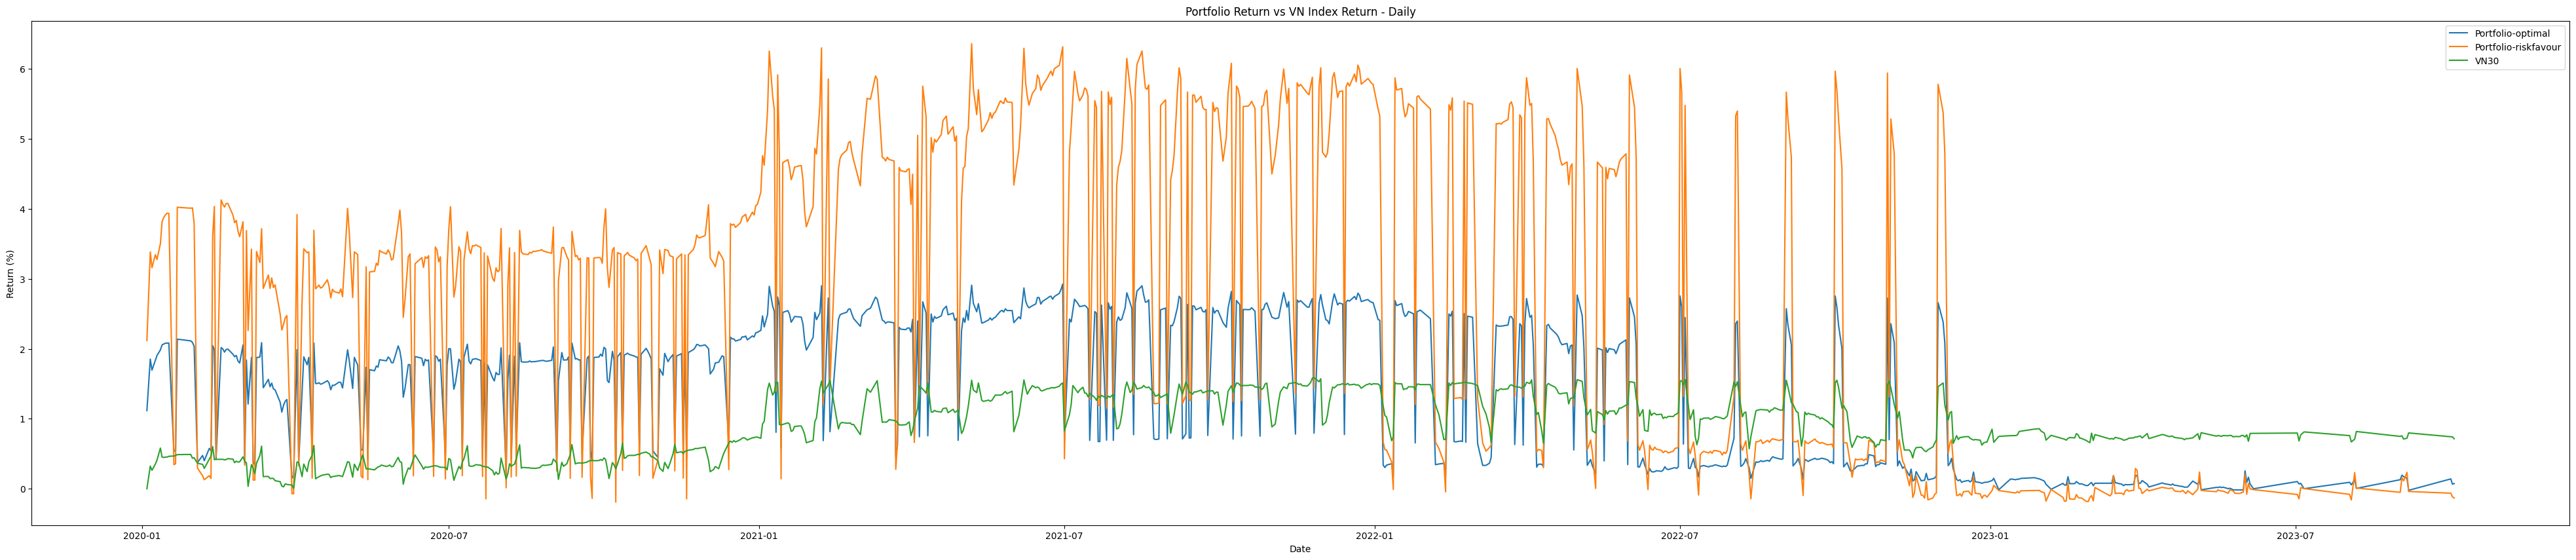

In [361]:
# Vẽ đồ thị với matplotlib

plt.figure(figsize=(50, 10))

dates = dat_index['Date'].values[:849]  # Đảm bảo số lượng điểm dữ liệu trên trục x khớp với số lượng điểm dữ liệu trên trục y
portfolio_return_optimal = portfolio_return_optimal[:849]
portfolio_return_riskfavour = portfolio_return_riskfavour[:849]
vn30_return = vn30_return[:849]

plt.plot(dates, portfolio_return_optimal, label='Portfolio-optimal')
plt.plot(dates, portfolio_return_riskfavour, label='Portfolio-riskfavour')
plt.plot(dates, vn30_return, label='VN30')

plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.title('Portfolio Return vs VN Index Return - Daily')

plt.legend()
plt.show()

Tuy nhiên do giới hạn của Matplolib, tác giả sử dụng thư viện tương tác như plotly để trình bày

In [362]:
import plotly.graph_objects as go
import pandas as pd

# Tạo DataFrame dữ liệu
data = pd.DataFrame({
    'Date': dates,
    'Portfolio-optimal': portfolio_return_optimal.squeeze(),
    'Portfolio-riskfavour': portfolio_return_riskfavour.squeeze(),
    'VN30': vn30_return.squeeze()
})

# Tạo figure và đồ thị
fig = go.Figure()

# Vẽ đường dữ liệu cho từng cột
fig.add_trace(go.Scatter(x=data['Date'], y=data['Portfolio-optimal'], name='Portfolio-optimal', mode='lines'))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Portfolio-riskfavour'], name='Portfolio-riskfavour', mode='lines'))
fig.add_trace(go.Scatter(x=data['Date'], y=data['VN30'], name='VN30', mode='lines'))

# Cấu hình trục x và trục y
fig.update_xaxes(title='Date', rangeslider_visible=True)
fig.update_yaxes(title='Return (%)')

# Cấu hình tiêu đề và hiển thị legend
fig.update_layout(title='Portfolio Return vs VN Index Return - Daily', showlegend=True)

# Hiển thị đồ thị tương tác
fig.show()


### 6. Kết luận
- Khi so sánh danh mục tối ưu nhất Portfolio-optimal và danh mục theo khẩu vị rủi ro nhà đâu tư Portfolio-riskfavour thì hiển nhiên danh mục rủi ro cao sẽ mang lại lợi nhuận cao hơn trong thời kỳ thị trường chứng khoán phát triển và ngược lại trong thời kỳ suy thoái.

- Tuy nhiên, cả hai danh mục trên đều biến động lớn so với biến động của chỉ số VN30. Điều này có thể được giải thích bằng việc 12 tài sản mà nhà đầu tư quan tâm là một con số quá ít so với 30 mã cố phiếu dẫn đầu thị trường, từ đó mô hình chưa thể đưa ra một số liệu tốt nhất. Ngoài ra, các cổ phiếu được lựa chọn ngay từ ban đầu có thể lại là những mã cổ phiếu tăng trưởng tệ hơn, biến động nhiều hơn so với những mã cổ phiếu khác trên VN30.
 
- Như vậy, ngoài việc tăng số lượng tài sản lên 30 để cải thiện phân tích, nhà đầu tư nên tính đến việc lựa chọn mã tối ưu theo ngành nghề cho danh mục của mình để đa dạng hoá ngành. Sau đó vẫn với khẩu vị rủi ro cao nhất, nhà đầu tư nên sử dụng thêm các công cụ để nâng cao độ nhạy thông tin và lựa chọn nắm giữ danh mục trong thời kỳ thị trường phát triển và chọn bán nhanh chóng (tuân thủ bán với biên độ giảm nhất định so với đỉnh gần nhất) khi thị trường có dấu hiệu suy thoái.

- Tóm lại, nhà đầu tư vẫn có thể chọn danh mục Portfolio-riskfavor với tỷ trọng tương ứng phía trên nếu nhà đầu tư có thể cải thiện được một số khuyết điểm đã đề cập trước đó